# 12 - Systems of Linear Equations

A **system of linear equations** is a collection of two or more linear relationships involving the same set of variables. Each equation in the system represents a linear relationship between the variables. The general form of a system of linear equations with $m$ equations and $n$ variables is:

$$
\begin{align*}
    a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n &= b_1 \\
    a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n &= b_2 \\
    & \ \ \vdots \\
    a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n &= b_m \\
\end{align*}
$$

where $x_1, x_2, \dots, x_n$ are the variables $a_{ij}$ are the coefficients and $b_i$ are the constants.

## 12.1 - Motivation

Given the data $x$ and the linear operator $A$, we can encode $x$ into a new data $y = Ax$. Now, suppose we have the encoded data $y$ and the operator $A$. The question arises: how can we recover the original data $x$?

Consider the following example: If $x$ represents the data for an image, then applying a blur operator $A$ would result in a distorted image with data $y$.

## 12.2 - Methods for Solving Systems of Equations

1. **Cramer's Rule**
    - Suitable for systems with the same number of equations and variables.
    - Express each variable as a ratio of determinants involving the coefficient matrix and constant vector.
2. **Substitution Method**
    - Solve one equation for one variable and substitute it into the other equations.
    - Repeat the process until all variables are found.
3. **Elimination Method (or Addition Method)**
    - Add or subtract multiples of equations to eliminate one variable.
    - Repeat the process until all variables are found.
4. **Matrix Method (or Gaussian Elimination)**
    - Represent the system of equations as matrix equation $Ax = b$.
    - Use row operations to transform the augmented matrix $[A|b]$ to row-echelon form or reduced row-echelon form.
    - Solve the resulting system of equations by back-substitution.
5. **Inverse Matrix Method**
    - If the coefficient matrix $A$ is invertible, solve the system using $x = A^{-1}b$.
    - Compute the inverse of $A$ and multiply it by the constant vector $b$ to find the solution vector $x$.

## 12.3 - Cramer's Rule

To solve a linear system $A\vec{x} = \vec{v}$ using Cramer's Rule, we first need to ensure that $A$ is a square matrix and that its determinant is not zero. Cramer's Rule provides a method to solve for each variable in the system directly, using determinants. The rule states that for a linear system $A\vec{x} = \vec{v}$, where $A$ is an $n \times n$ matrix and $\vec{v}$ is a vector, the solution for each variable $x_i$ is given by:

$$ x_i = \frac{\det(A_i)}{\det(A)} $$

where $A_i$ is the matrix formed by replacing the $i$-th column of $A$ with the vector $\vec{v}$.

**Example:** Solve the equation $A\vec{x} = \vec{v}$, where

$$
\begin{bmatrix}
    2 & 1 & 4 & 0 \\
    1 & 3 & 2 & 3 \\
    3 & 4 & 0 & 0 \\
    4 & 2 & 3 & 1
\end{bmatrix}
$$

and $\vec{v} = [1, 2, 3, 4]$.

In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

a = np.array([[2, 1, 4, 0], [1, 3, 2 , 3], [3, 4, 0, 0], [4, 2, 3, 1]])
v = np.array([1, 2, 3, 4])

## 12.4 - How to Solve Systems of Equations in NumPy

For the linear system of equations $A\vec{x} = \vec{b}$:
1. Define the coefficients matrix $A$ and the constants vector $b$.
2. Use NumPy's `np.linalg.solve()` function to solve the system of equations: `x = np.linalg.solve(A, b)`.
3. Print or use the solution vector $x$ to obtain the values of the variables.

**Example:** Solve the equation $A\vec{x} = \vec{v}$, where $A$ and $\vec{v}$ are given in the previous example.

In [2]:
x = np.linalg.solve(a, v)
x

array([ 1.11428571, -0.08571429, -0.28571429,  0.57142857])

## 12.5 - Recovering a Blurred Image

To recover a distorted image, we employ the method of solving a system of linear equations. First, we utilize the `Pillow` package to generate an image. Then, we apply a Toeplitz matrix to introduce distortion to the image.

Shape of the image array: (20, 120)


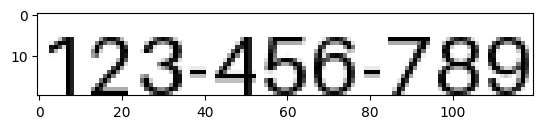

In [3]:
numbers = '123-456-7890'
w = 120
h = 20

# 'L' mode for grayscale image
image = Image.new('L', (w, h), color=255)
draw = ImageDraw.Draw(image)
font = ImageFont.load_default(size=20)
draw_point = (0, 0)
draw.text(draw_point, numbers, fill=0, font=font)
image_array = np.array(image)
print('Shape of the image array:', image_array.shape)
plt.imshow(image_array, cmap='gray')
plt.show()

Now, we can flatten the image to create a vector `x_array`.

In [4]:
x_array = image_array.flatten()
x_array.shape

(2400,)

Toeplitz matrix and distort the image by using matrix multiplication.

In [5]:
n = w * h
toeplitz_mat = np.zeros((n, n))
diag_vals = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]
for i, x in enumerate(diag_vals):
    toeplitz_mat += np.diag(x * np.ones(n - i), i)
    if i > 0:
        toeplitz_mat += np.diag(0.4 * np.ones(n - i), -i)

y = toeplitz_mat @ x_array
y.shape

(2400,)

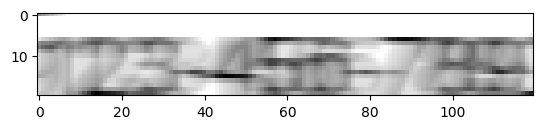

In [6]:
blurred_image = y.reshape(h, w)
plt.imshow(blurred_image, cmap='gray')
plt.show()

With the distorted data $y$ and Toeplitz matrix, we can solve the equation to get back to $x$.

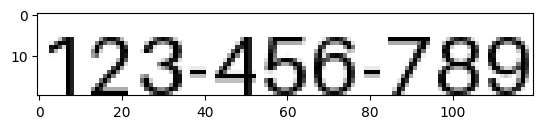

In [7]:
x = np.linalg.solve(toeplitz_mat, y)
x_rec = x.reshape(h, w)
plt.imshow(x_rec, cmap='gray')
plt.show()

## 12.6 - Complexity of Solving a System of Linear Equations

The complexity of solving a system of linear equations refer to the computational effort required to find the solution, typically measured in terms of the number of arithmetic operations (e.g., additions, multiplications) or the time taken to solve the system. Complexity analysis helps us to understand how the computational cost scales with the size of the system.

Here are some factors to be considered:
1. Identify the algorithm used to solve the system of linear equations.
2. Count the number of elementary arithmetic operations (additions, multiplications) or the number of iterations required by the algorithm as a function of the problem size $n$.
3. Express the computational complexity using Big O notation.
4. Analyze how the complexity scales with the size of the system $n$.

### Forward Substitution for Lower Triangular Systems

**Forward substitution** is an algorithm used to solve systems of linear equations where the coefficient matrix is lower triangular. Given a lower triangular matrix $L$ and a vector $\vec{b}$, the goal is to find a vector $\vec{x}$ such that $L\vec{x} = \vec{b}$.

A lower triangular matrix $L$ is defined as a matrix where all the entries above the main diagonal are zero, i.e. $L_{ij} = 0$ for $i < j$. The general form of a lower triangular matrix is:

$$
L =
\begin{bmatrix}
    l_{11} & 0 & 0 & \dots & 0 \\
    l_{21} & l_{22} & 0 & \dots & 0 \\
    l_{31} & l_{32} & l_{33} & \dots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    l_{n1} & l_{n2} & l_{n3} & \dots & l_{nn}
\end{bmatrix}
$$

In forward substitution, we solve the equation system starting from the first equation, solving for $x_1$, then using $x_1$ to solve for $x_2$, and so on, until $x_i$ are solved.

If we already knew the values of $x_1, x_2, \dots, x_{i-1}$. Then we can solve for $x_i$ as:

$$ x_i = \frac{b_i - (l_{i1}x_1 + l_{i2}x_2 + \dots + l_{i, i - 1}x_{i - 1})}{l_{ii}} $$

assuming $l_{ii} \neq 0$.

**Example:** Solve the following system of equations using the forward substitutions.

$$
\begin{align*}
    y_1 & & & &= 28, \\
    y_1 &+ y_2 & & &= 36, \\
    y_1 &+ y_2 &+ y_3 & &= 43, \\
    y_1 &+ y_2 &+ y_3 &+ y_4 &= 51
\end{align*}
$$

### Backward Substitution for Upper Triangular Systems

**Backward substitution** is used to solve systems of linear equations where the coefficient matrix is upper triangular. Given an upper triangular matrix $U$ and a vector $\vec{b}$, the aim is to find a vector $\vec{x}$ such that $U\vec{x} = \vec{b}$.

An upper triangular matrix $U$ is defined as a matrix where all the entries below the main diagonal are zero, i.e. $U_{ij} = 0$ for $i > j$. The general form of an upper triangular matrix is:

$$
U =
\begin{bmatrix}
    u_{11} & u_{12} & u_{13} & \dots & u_{1n} \\
    0 & u_{22} & u_{23} & \dots & u_{2n} \\
    0 & 0 & u_{33} & \dots & u_{3n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots & u_{nn}
\end{bmatrix}
$$

In backward substitution, we start solving the system from the last equation (which involves only $x_n$), then proceed upwards, using the previously solved values to find the remaining unknowns.

**Example:** Solve the following system of equations using backward substitutions.

$$
\begin{align*}
    2x_1 + 3x_2 + 4x_3 + 5x_4 &= 28, \\
    x_2 + 2x_3 + x_4 &= 8, \\
    3x_3 + x_4 &= 7, \\
    2x_4 &= 8
\end{align*}
$$

## 12.7 - Triangular Systems Complexity

### Forward Substitution

For a system of linear equations represented by a lower triangular matrix $L$ and vector $\vec{b}$, the forward substitution algorithm is given by:

$$ x_i = \frac{b_i - \sum^{i-1}_{j=1} l_{ij} x_j}{l_{ii}}, \ \ \  i = 1, 2, \dots, n. $$

This involves:
- $n$ divisions
- $\frac{n(n-1)}{2}$ subtractions/additions
- $\frac{n(n-1)}{2}$ multiplications

The computational complexity is $O(n^2)$, considering both the multiplications and the additions/subtractions.

### Backward Substitution

For a system of linear equations represented by an upper triangular matrix $U$ and vector $\vec{b}$, the forward substitution algorithm is given by:

$$ x_i = \frac{b_i - \sum^n_{j=i+1} u_{ij} x_j}{u_{ii}}, \ \ \  i = n, n - 1, \dots, 1. $$

This also involves:
- $n$ divisions
- $\frac{n(n-1)}{2}$ subtractions/additions
- $\frac{n(n-1)}{2}$ multiplications

The computational complexity is $O(n^2)$, considering both the multiplications and the additions/subtractions.

In both cases, the quadratic complexity arises from the nested summation term, which implies a double iteration over the elements of the matrix for each element of $x$ being solved.

## 12.8 - LU Decomposition

**LU Decomposition**, or **LU factorization**, is a matrix decomposition method that factors a matrix $A$ into the product of a lower triangular matrix $U: A = LU$. The LU decomposition is widely used in numerical linear algebra for solving systems of linear equations, matrix inversion, and other matrix-related computations.

To solve a system of linear equations $Ax = b$ using LU decompostion:
1. **Decompose the Matrix:** Decompose the coefficient matrix $A$ into its LU factors using LU decomposition.
2. **Forward Substitution:** Solve the equation $Ly = b$ for $y$ using forward substitution, where $L$ is the lower triangular matrix obtained from the decomposition.
3. **Backward Substitution:** Solve the equation $Ux = y$ for $x$ using backward substitution, where $U$ is the upper triangular matrix obtained from the decomposition.
4. **Solution:** The vector $x$ obtained from the backward substitution is the solution to the system of equations $Ax = b$.

**Example:** Solve the following system of equations using LU decomposition, forward and backward substitutions.

$$
\begin{align*}
    2x_1 + 3x_2 + 4x_3 + 5x_4 &= 28, \\
    2x_1 + 4x_2 + 6x_3 + 6x_4 &= 36, \\
    2x_1 + 4x_2 + 9x_3 + 7x_4 &= 43, \\
    2x_1 + 4x_2 + 9x_3 + 9x_4 &= 51
\end{align*}
$$

In [8]:
# Define the coefficient matrix
A = np.array([[2, 3, 4, 5], [2, 4, 6, 6], [2, 4, 9, 7], [2, 4, 9, 9]])

# Define the constant vector
b = np.array([28, 36, 43, 51])

Now we can use the `scipy` package to decompose the matrix.

In [10]:
from scipy.linalg import lu

P, L, U = lu(A)
print(P)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [11]:
print(L)

[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]


In [12]:
print(U)

[[2. 3. 4. 5.]
 [0. 1. 2. 1.]
 [0. 0. 3. 1.]
 [0. 0. 0. 2.]]


## 12.9 - LU Factorization Complexity

This section seems to be missing :(

## 12.10 - Special Case: $2 \times 2$ Matrix

Consider a $2 \times 2$ matrix $A$ given by:

$$
A = 
\begin{pmatrix}
    a & b \\
    c & d
\end{pmatrix}
$$

Our goal is to factorize $A$ into the product of a lower triangular matrix $L$ and an upper triangular matrix $U$:

$$
\begin{pmatrix}
    a & b \\
    c & d
\end{pmatrix}
=
\begin{pmatrix}
    1 & 0 \\
    l_{21} & 1
\end{pmatrix}
\begin{pmatrix}
    u_{11} & u_{12} \\
    0 & u_{22}
\end{pmatrix}
$$

From this, we derive the components of $L$ and $U$:
- For the first row, $a = u_{11}$ and $b = u_{12}$.
- For the second row, $c = l_{21} u_{11}$, so $l_{21} = \frac{c}{u_{11}} = \frac{c}{a}$.
- Finally, $d = l_{21}u_{12} + u_{22}$. Since we already have $u_{12} = b$, it follows that $u_{22} = d - l_{21}b = d - \frac{c}{a}b$.

Therefore, the LU decomposition of matrix $A$ is:

$$
L =
\begin{pmatrix}
    1 & 0 \\
    \frac{c}{a} & 1
\end{pmatrix}
, U =
\begin{pmatrix}
    a & b \\
    0 & d - \frac{c}{a}b
\end{pmatrix}
$$

## 12.11 - General $n \times n$ Matrix

Consider a general $n \times n$ matrix $A$. The decomposition can be represented as:

$$
A = LU =
\begin{pmatrix}
    1 & \vec{0} \\
    \vec{l}_{21} & L_{22}
\end{pmatrix}
\begin{pmatrix}
    u_{11} & \vec{u}_{12} \\
    \vec{0} & U_{22}
\end{pmatrix}
=
\begin{pmatrix}
    u_{11} & \vec{u}_{12} \\
    u_{11} \vec{u}_{21} & L_{22}U_{22} + \vec{u}_{12} \vec{l}_{21}
\end{pmatrix}
$$

where $\vec{l}_{21}$ is a column vector, $\vec{u}_{12}$ is a row vector, and $L_{22}, U_{22}$ are $(n - 1) \times (n - 1)$ matrices.

Matching the elements in the product of $L$ and $U$ with those in $A$, we have:

$$
\begin{align*}
    a_{11} &= u_{11} \\
    \vec{a}_{12} &= \vec{u}_{12} \\
    \vec{a}_{21} = \vec{l}_{21} u_{11} \rightarrow \vec{l}_{21} &= \frac{\vec{a}_{21}}{u_{11}} \\
    A_{22} = \vec{l}_{21} \vec{u}_{12} + & L_{22} U_{22}
\end{align*}
$$

Below are the steps to perform the LU decomposition:
1. The first row of $U$ matches the first row of $A$.
2. The first column of $L$ matches the first column of $A$ divided by $a_{11}: \vec{l}_{21} = \frac{\vec{a}_{21}}{a_{11}}$.
3. $L_{22} U_{22} = A_{22} - \vec{l}_{21} \vec{u}_{12}$, where $L_{22}$ and $U_{22}$ are $(n - 1) \times (n - 1)$ matrices, obtained by induction.

### Computational Steps

1. **Number of Divisions:** The total number of divisions required for LU factorization is the sum of the first $n - 1$ positive integers, which is $\frac{n(n-1)}{2}$.
2. **Number of Multiplications and Subtractions:** For each element outside the diagonal in $L$ and $U$, a multiplication followed by a subtraction is required to update elements in $A$. The total number for each is given by summing up the series from $1$ to $n - 1$ for each row, excluding the diagonal for the current column, leading to the formula $\frac{n^3 - n}{3}$ for multiplications and an identical count for subtractions.

### Computational Complexity

- **Number of Divisions:** $\frac{n(n-1)}{2}$
- **Number of Multiplications:** $\sum^{n-1}_{i=1} i(i+1) = \frac{n(n-1)(2n-1)}{6} + \frac{n(n-1)}{2}$
- **Number of Subtractions:** Identical to the number of multiplications, since for each multiplication in the update process, a corresponding subtraction is made.

The dominating term in the computational cost is due to the multiplications (and subtractions), leading to a computational complexity of $O(n^3)$ for LU factorization. The cubic complexity reflects the intensive computation involved, especially as the size of the matrix $A$ increases.

### Remarks

The cost analysis highlights the efficiency of LU factorization for solving systems of linear equations, especially when dealing with multiple right-hand sides. By investing in an $O(n^3)$ operation upfront, subsequent solutions for different vectors $b$ in $Ax = b$ can be obtained with only $O(n^2)$ operations, leveraging the already factored matrices $L$ and $U$.